# Ejercicio 4
## Integrante: Lautaro Rivieri

## 1. Desarrollar un diagrama de flujo, por ejemplo usando Dia, o alguna versión online.

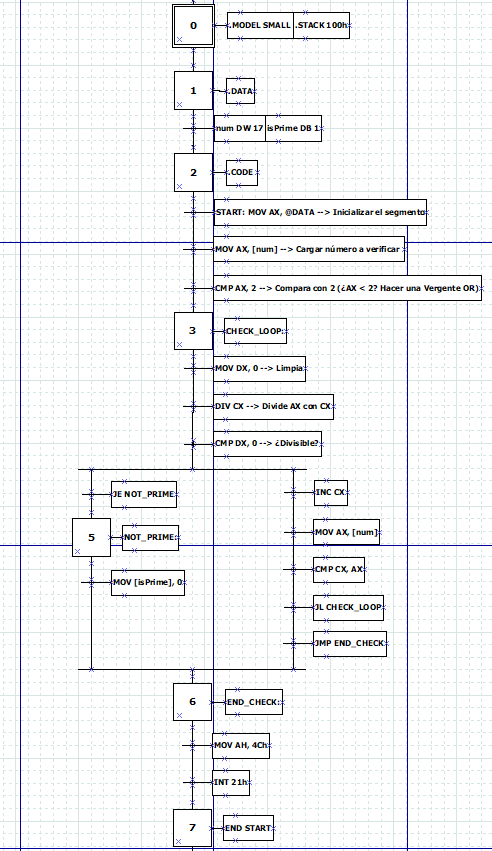

## 2. Explicar, comentar las sentencias que no tienen comentarios.

In [ ]:
.MODEL SMALL
.STACK 100h
.DATA
    num     DW 17
    isPrime DB 1       ; 1 = primo, 0 = no primo
.CODE
START:
    MOV AX, @DATA      ; Inicializa el segmento de datos
    MOV DS, AX         ; Carga DS con la dirección de los datos

    MOV AX, [num]      ; Carga el número a verificar en AX
    CMP AX, 2          ; Compara con 2 (el primer número primo)
    JL NOT_PRIME       ; Si es menor que 2, no es primo

    MOV CX, 2          ; Contador desde 2 (primer divisor posible)
CHECK_LOOP:
    MOV DX, 0          ; Limpia DX para la división (parte alta del dividendo)
    DIV CX             ; DX:AX / CX - Divide AX por el contador CX
    CMP DX, 0          ; ¿Divisible? (¿resto = 0?)
    JE NOT_PRIME       ; Si es divisible, no es primo

    INC CX             ; Incrementa el contador (siguiente divisor)
    MOV AX, [num]      ; Restaurar AX (se perdió después de DIV)
    CMP CX, AX         ; Compara contador con el número original
    JL CHECK_LOOP      ; Si CX < número, continúa el bucle

    JMP END_CHECK      ; Terminó el bucle, es primo

NOT_PRIME:
    MOV [isPrime], 0   ; Marca como no primo (0)

END_CHECK:
    MOV AH, 4Ch        ; Función de terminación de programa
    INT 21h            ; Llamada al sistema DOS
END START

## 3. Implementar en Turbo Asm.

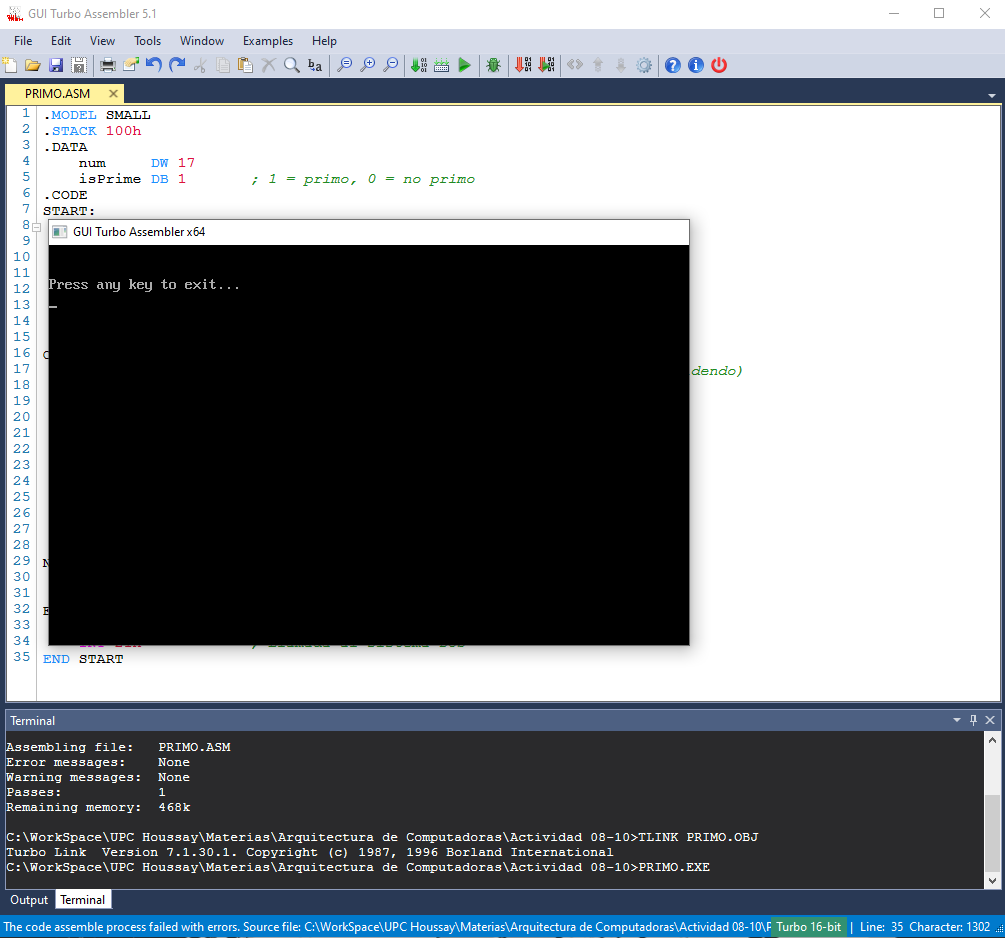

## 4. Implementar en linux. De no tener uno, usar Google Colab.

In [ ]:
section .data
    num     dw 17          ; Número a verificar si es primo
    isPrime db 1           ; 1 = primo, 0 = no primo (inicialmente asumimos que es primo)

section .text
    global _start

_start:
    mov ax, [num]          ; Cargar el número en AX
    cmp ax, 2              ; Comparar con 2 (primer número primo)
    jl not_prime           ; Si es menor que 2, no es primo

    mov cx, 2              ; Inicializar contador en 2 (primer divisor posible)

check_loop:
    mov dx, 0              ; Limpiar DX para la división (parte alta del dividendo)
    div cx                 ; DX:AX / CX - Divide AX por CX
    cmp dx, 0              ; Verificar si el resto (DX) es cero
    je not_prime           ; Si es divisible, no es primo

    inc cx                 ; Incrementar el divisor
    mov ax, [num]          ; Restaurar AX (DIV modifica AX)
    cmp cx, ax             ; ¿Llegamos al número original?
    jl check_loop          ; Si no, continuar bucle

    jmp end_check          ; Si terminó el bucle, es primo

not_prime:
    mov byte [isPrime], 0  ; Marcar como no primo

end_check:
    ; Convertir el resultado a código de salida
    movzx ebx, byte [isPrime]  ; Cargar isPrime (0 o 1) en EBX

    ; Llamada al sistema para terminar programa
    mov eax, 1             ; sys_exit
    int 0x80               ; Interrupción del kernel Linux

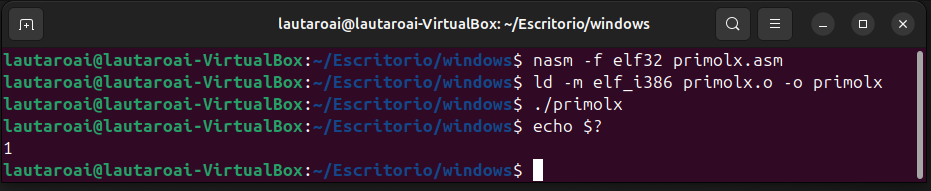

## 5. Pegar las sentencias usadas en linux para compilar y linkear.

In [ ]:
# Compilar y enlazar
nasm -f elf32 primolx.asm
ld -m elf_i386 primolx.o -o primolx

# Ejecutar y ver resultado
./primolx
echo $?

## 6. Investigar y agregar sentencias para ingresar valores por teclado en un par de ejercicios. Fibonacci y verificar números primos, otros…



In [ ]:
.MODEL SMALL
.STACK 100h
.DATA
    num     DW ?
    isPrime DB 1       ; 1 = primo, 0 = no primo
    msg1    DB 'Ingrese un numero: $'
    msg2    DB 13,10,'El numero es primo.$'
    msg3    DB 13,10,'El numero no es primo.$'
    buffer  DB 6,?,6 DUP('$')  ; Buffer para entrada
.CODE
START:
    MOV AX, @DATA      ; Inicializa el segmento de datos
    MOV DS, AX         ; Carga DS con la dirección de los datos

    ; Mostrar mensaje para ingresar número
    MOV AH, 09h
    LEA DX, msg1
    INT 21h

    ; Leer número desde teclado
    CALL LEER_NUMERO

    ; Verificar si es primo
    CALL VERIFICAR_PRIMO

    ; Mostrar resultado
    CALL MOSTRAR_RESULTADO

    ; Terminar programa
    MOV AH, 4Ch
    INT 21h

; Procedimiento para leer número desde teclado
LEER_NUMERO PROC
    MOV AH, 0Ah        ; Función para leer cadena
    LEA DX, buffer     ; DX apunta al buffer
    INT 21h

    ; Convertir cadena a número
    MOV SI, OFFSET buffer + 2  ; SI apunta al inicio de los dígitos
    MOV AX, 0          ; Inicializar AX en 0
    MOV CX, 10         ; Base 10 para la conversión

CONVERTIR:
    MOV BL, [SI]       ; Obtener carácter actual
    CMP BL, 13         ; ¿Es Enter?
    JE FIN_CONVERSION  ; Si sí, terminar

    ; Verificar si es dígito
    CMP BL, '0'
    JB FIN_CONVERSION
    CMP BL, '9'
    JA FIN_CONVERSION

    ; Convertir carácter a dígito
    SUB BL, '0'
    MOV BH, 0

    ; AX = AX * 10 + BX
    MUL CX             ; AX * 10
    ADD AX, BX         ; + nuevo dígito

    INC SI             ; Siguiente carácter
    JMP CONVERTIR

FIN_CONVERSION:
    MOV [num], AX      ; Guardar número convertido
    RET
LEER_NUMERO ENDP

; Procedimiento para verificar si es primo
VERIFICAR_PRIMO PROC
    MOV AX, [num]      ; Carga el número a verificar en AX
    CMP AX, 2          ; Compara con 2
    JL NO_PRIMO        ; Si es menor que 2, no es primo

    ; Caso especial para número 2
    CMP AX, 2
    JE ES_PRIMO

    ; Verificar si es par (excepto 2)
    TEST AX, 1
    JZ NO_PRIMO

    MOV CX, 3          ; Empezar desde 3 (ya verificamos pares)

CHECK_LOOP:
    MOV DX, 0          ; Limpia DX para la división
    MOV AX, [num]      ; Cargar número original
    DIV CX             ; DX:AX / CX

    CMP DX, 0          ; ¿Divisible?
    JE NO_PRIMO        ; Si es divisible, no es primo

    ; Incrementar contador en 2 (solo números impares)
    ADD CX, 2

    ; Verificar si CX * CX > num (optimización)
    MOV AX, CX
    MUL CX
    CMP AX, [num]
    JBE CHECK_LOOP     ; Continuar si CX² <= num

    JMP ES_PRIMO       ; Terminó el bucle, es primo

NO_PRIMO:
    MOV [isPrime], 0   ; Marcar como no primo
    RET

ES_PRIMO:
    MOV [isPrime], 1   ; Marcar como primo
    RET
VERIFICAR_PRIMO ENDP

; Procedimiento para mostrar resultado
MOSTRAR_RESULTADO PROC
    CMP [isPrime], 1
    JE MOSTRAR_PRIMO

    ; Mostrar mensaje de no primo
    MOV AH, 09h
    LEA DX, msg3
    INT 21h
    RET

MOSTRAR_PRIMO:
    ; Mostrar mensaje de primo
    MOV AH, 09h
    LEA DX, msg2
    INT 21h
    RET
MOSTRAR_RESULTADO ENDP

END START

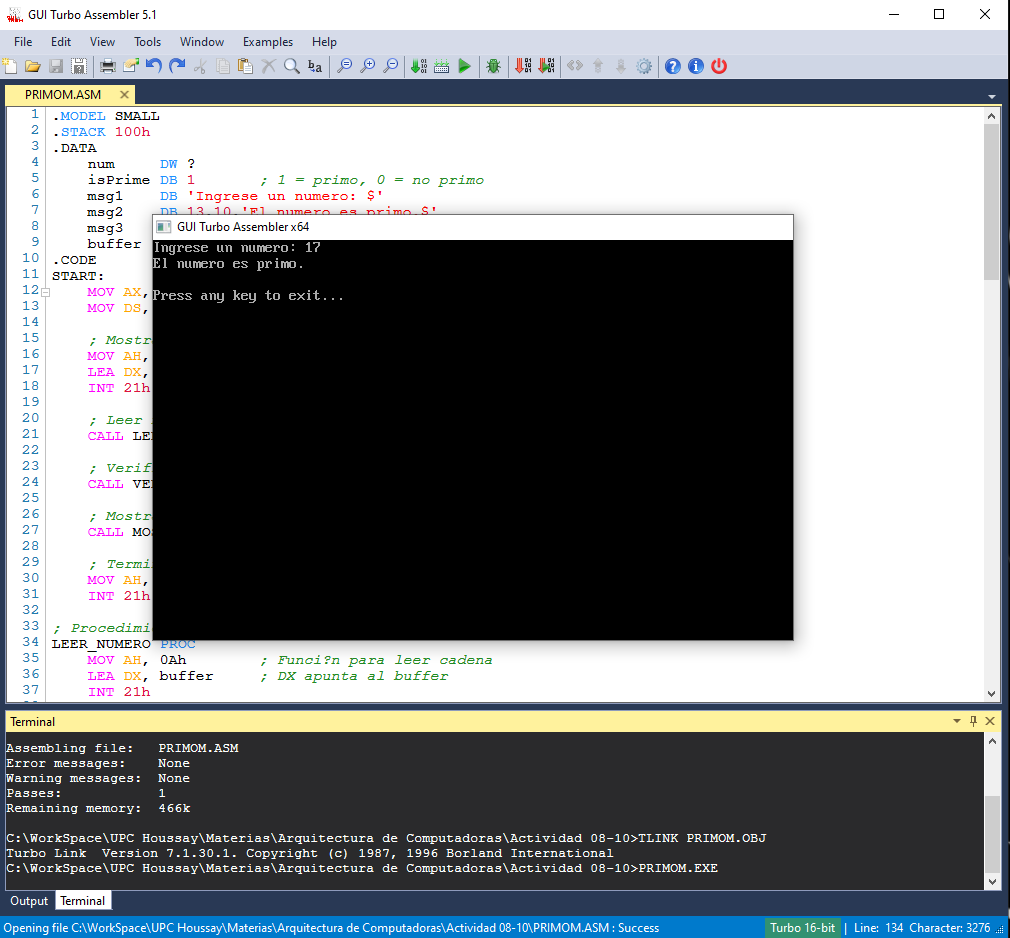

## 7. Generar en Google Colab, con la IA, la misma versión de problema, pero resuelto en C.

Prompt --> [Deepseek](https://chat.deepseek.com/share/hpu6ix7rwj36mynh78)


In [ ]:
%%file primo.c
#include <stdio.h>
#include <stdbool.h>
#include <math.h>

bool esPrimo(int numero) {
    if (numero <= 1) return false;
    if (numero == 2) return true;
    if (numero % 2 == 0) return false;

    int limite = sqrt(numero);
    for (int i = 3; i <= limite; i += 2) {
        if (numero % i == 0) return false;
    }
    return true;
}

int main() {
    // Casos de prueba fijos
    int prueba1 = esPrimo(17);  // primo
    int prueba2 = esPrimo(25);  // no primo
    int prueba3 = esPrimo(29);  // primo
    int prueba4 = esPrimo(1);   // no primo

    return 0;
}

Overwriting primo.c


In [ ]:
!gcc primo.c -o primo -lm
!./primo

## 8. Ejecutar y obtener el programa en lenguaje ensamblador. A partir del Ítem anterior


In [ ]:
# Ensamblador sin optimización
!gcc -S -O0 primo.c -o primo_O0.s

# Ensamblador con optimización básica
!gcc -S -O1 primo.c -o primo_O1.s

# Ensamblador con optimización máxima
!gcc -S -O3 primo.c -o primo_O3.s

In [ ]:
# Listar archivos generados
!ls -la *.s

-rw-r--r-- 1 root root 1408 Oct 15 16:52 primo_compact.s
-rw-r--r-- 1 root root 1739 Oct 15 16:51 primo_O0.s
-rw-r--r-- 1 root root 1694 Oct 15 16:51 primo_O1.s
-rw-r--r-- 1 root root 2691 Oct 15 16:51 primo_O3.s
-rw-r--r-- 1 root root 1739 Oct 15 16:49 primo.s


In [ ]:
# Ensamblador mínimo sin información de debug
!gcc -S -O1 -fno-asynchronous-unwind-tables primo.c -o primo_compact.s
!cat primo_compact.s

	.file	"primo.c"
	.text
	.globl	esPrimo
	.type	esPrimo, @function
esPrimo:
	endbr64
	movl	$0, %eax
	cmpl	$1, %edi
	jle	.L17
	pushq	%rbx
	movl	%edi, %ebx
	movl	$1, %eax
	cmpl	$2, %edi
	je	.L1
	movl	$0, %eax
	testb	$1, %dil
	jne	.L20
.L1:
	popq	%rbx
	ret
.L20:
	pxor	%xmm0, %xmm0
	cvtsi2sdl	%edi, %xmm0
	pxor	%xmm1, %xmm1
	ucomisd	%xmm0, %xmm1
	ja	.L15
	sqrtsd	%xmm0, %xmm0
.L5:
	cvttsd2sil	%xmm0, %esi
	cmpl	$2, %esi
	jle	.L11
	movslq	%ebx, %rax
	imulq	$1431655766, %rax, %rax
	shrq	$32, %rax
	movl	%ebx, %edx
	sarl	$31, %edx
	subl	%edx, %eax
	leal	(%rax,%rax,2), %eax
	cmpl	%eax, %ebx
	je	.L12
	movl	$3, %ecx
.L6:
	addl	$2, %ecx
	cmpl	%ecx, %esi
	jl	.L21
	movl	%ebx, %eax
	cltd
	idivl	%ecx
	testl	%edx, %edx
	jne	.L6
	movl	$0, %eax
	jmp	.L1
.L15:
	call	sqrt@PLT
	jmp	.L5
.L21:
	movl	$1, %eax
	jmp	.L1
.L11:
	movl	$1, %eax
	jmp	.L1
.L12:
	movl	$0, %eax
	jmp	.L1
.L17:
	ret
	.size	esPrimo, .-esPrimo
	.globl	main
	.type	main, @function
main:
	endbr64
	subq	$8, %rsp
	movl	$17, %edi
	call	esPrimo
	movl	

## 9. Comparar las versiones de ensamblador.

La version generada en el item anterior (Punto 8) es por mucho las más compleja y completa, no se trata de un programa simple como el proporcionado al inicio. ya que maneja con mayor veolcidad números grandes, entre otras características que me serían difícil discernir con los conocimientos actuales del tema, por ello la comparativa se llevó a cabo usando IA.

Prompt --> **[Deepseek](https://chat.deepseek.com/share/2r5n7oa36ae192orsr)**

## 10. Observar situaciones problemáticas e identificar metodología de resolución de problemas.

Como problemáticas principales que pude identificar fueron:
1. ¿Cómo interpretar correctamente cada uno de los item para que se alineen al objetivo?
2. ¿Con cuál item comienzo?

Para mi primer duda, tuve que








Definir claramente la situación.


Analizar causas (no solo síntomas).


Generar alternativas (creatividad + tecnología).


Seleccionar estrategia viable.


Implementar solución.


Evaluar resultados y efectos colaterales.


Reflexionar y aprender para futuros problemas.


Se hace una observación
Se plantea una pregunta
Se formula una hipótesis o explicación que pueda ponerse a prueba
Se realiza una predicción con base en la hipótesis
Se pone a prueba la predicción
Se repite el proceso: se utilizan los resultados para formular nuevas hipótesis o predicciones.
